In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import wrangle
import seaborn as sns

In [2]:
z_df = wrangle.wrangle_zillow()



/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_code"] = df["fips"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_built"] = df["yearbuilt"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [3]:
z_df.head()

,Unnamed: 0,taxamount,latitude,longitude,regionidcounty,area_code,year_built,beds,tax_value,sq_ft,baths,lot_size,pools
0,0,11013.72,33634931.0,-117869207.0,1286.0,6059,1998,4,1023282,3100,3.5,4506.0,False
1,1,5672.48,34449266.0,-119281531.0,2061.0,6111,1967,2,464000,1465,1.0,12647.0,False
2,2,6488.30,33886168.0,-117823170.0,1286.0,6059,1962,3,564778,1243,2.0,8432.0,True
3,3,1777.51,34245180.0,-118240722.0,3101.0,6037,1970,4,145143,2376,3.0,13038.0,True
4,4,9516.26,34145202.0,-118179824.0,3101.0,6037,1950,4,773303,2962,3.0,63000.0,True


In [4]:
z_df.shape

(49581, 13)

In [5]:

z_train, z_test = train_test_split(z_df, train_size=0.8, random_state=123)
z_train, z_validate = train_test_split(z_train, train_size=0.7, random_state=123)


z_train.shape, z_validate.shape, z_test.shape

((27764, 13), (11900, 13), (9917, 13))

In [6]:
cols_to_scale = ['beds','sq_ft', 'baths', 'tax_value', 'lot_size', 'year_built']

In [7]:
def variable_pairs_plot(df, columns):
    sns.pairplot(z_train[columns] , corner=True ,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s': 1, 'alpha': 0.5}}) 


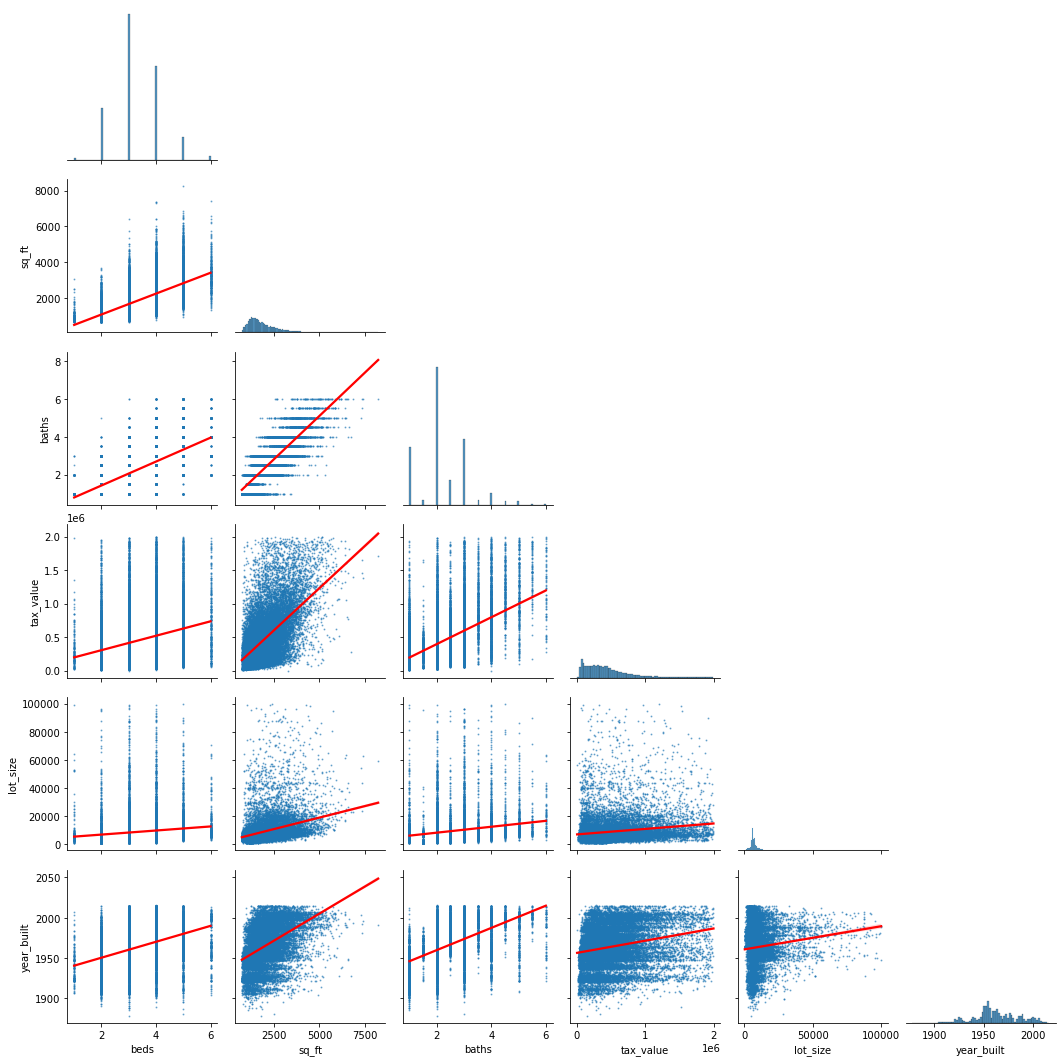

In [8]:
variable_pairs_plot(z_train, cols_to_scale)

In [10]:
cont_cols = ['sq_ft', 'baths', 'lot_size', 'tax_value']
cat_cols = ['beds', 'pools', 'area_code', 'regionidcounty']

In [11]:
def plot_categorical_and_continuous_vars(df, cat_cols, cont_cols):
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.violinplot(data=df, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.histplot(data = df, x = cont, bins = 50, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = df, x = cat, y = cont)
          
           

            

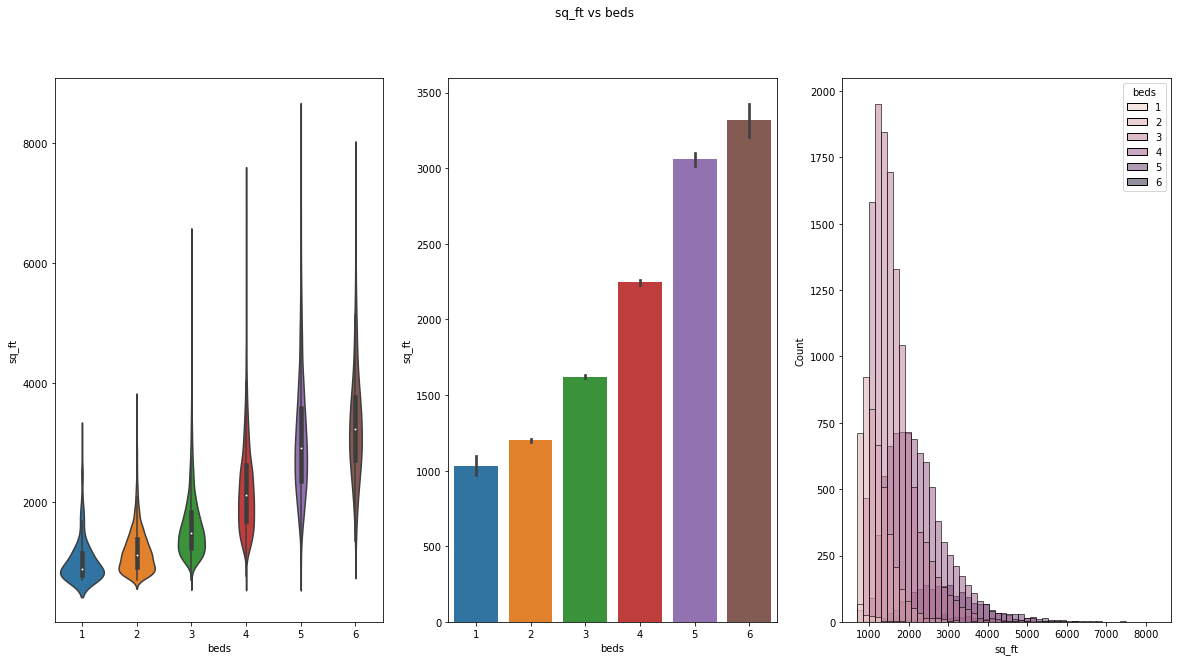

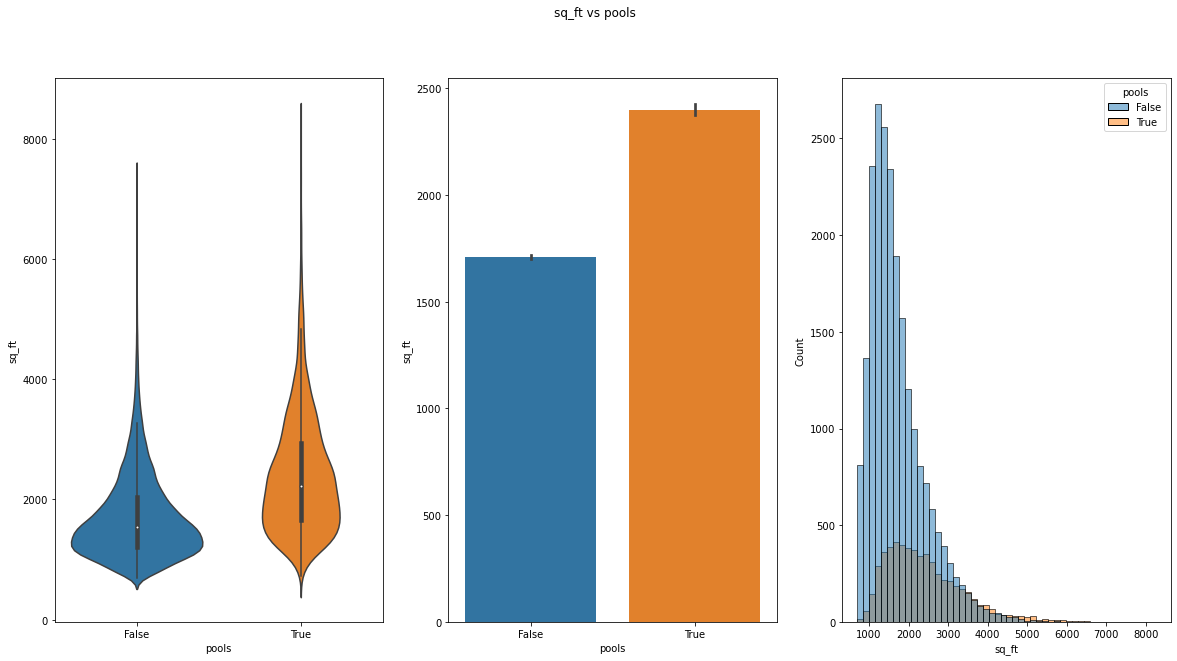

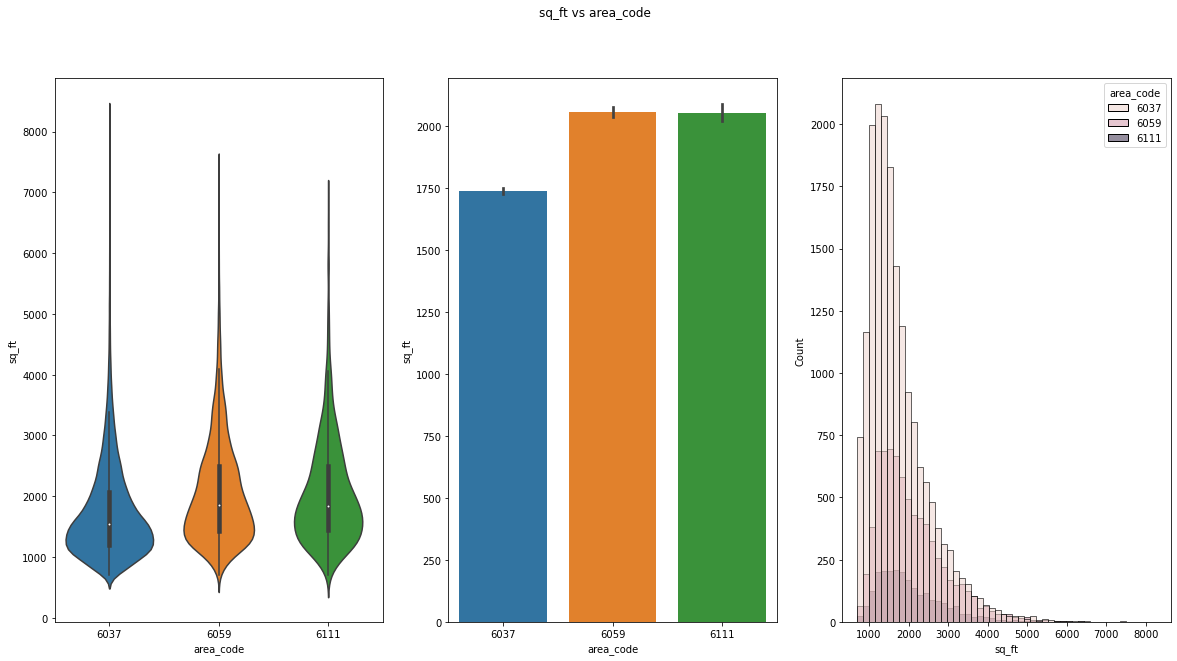

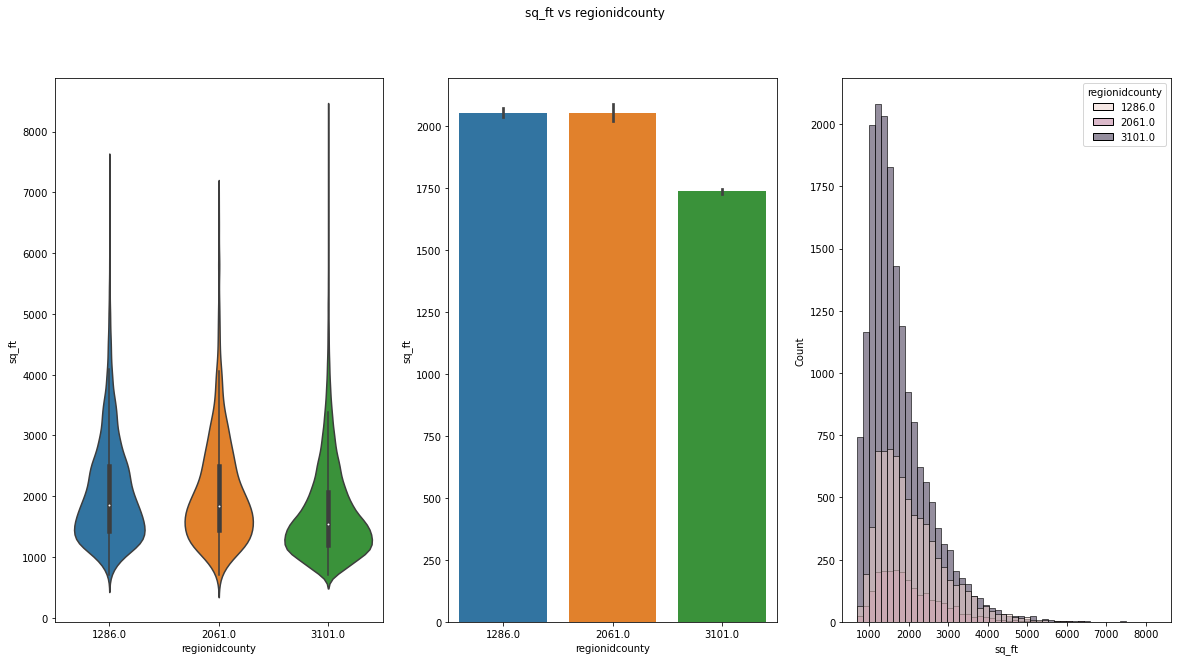

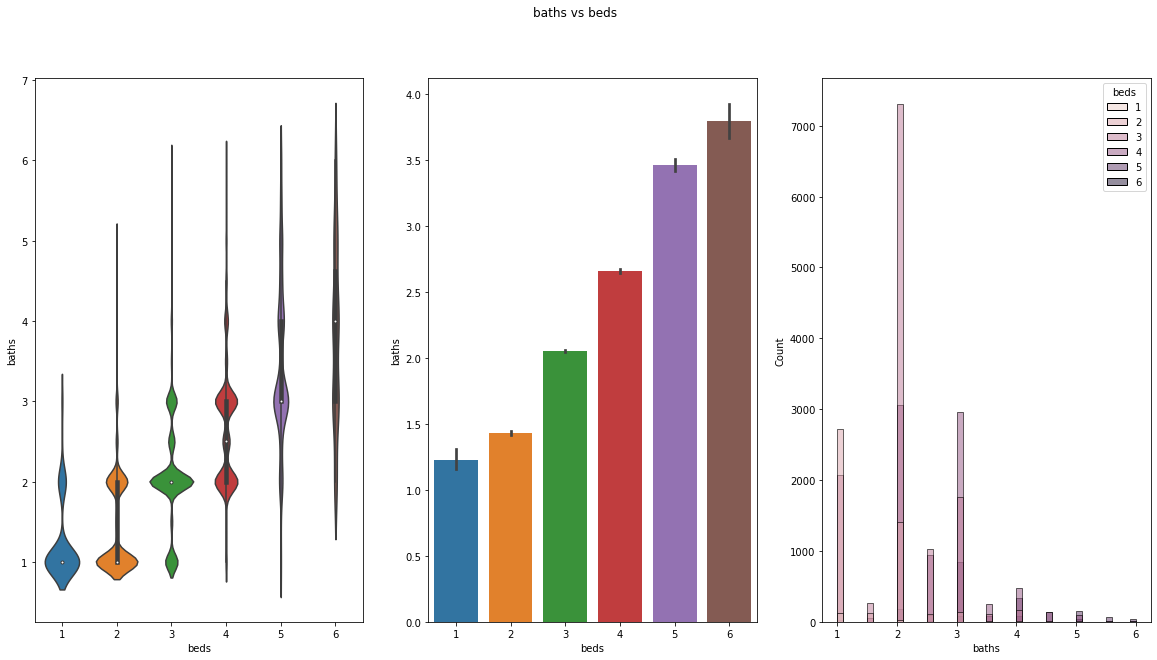

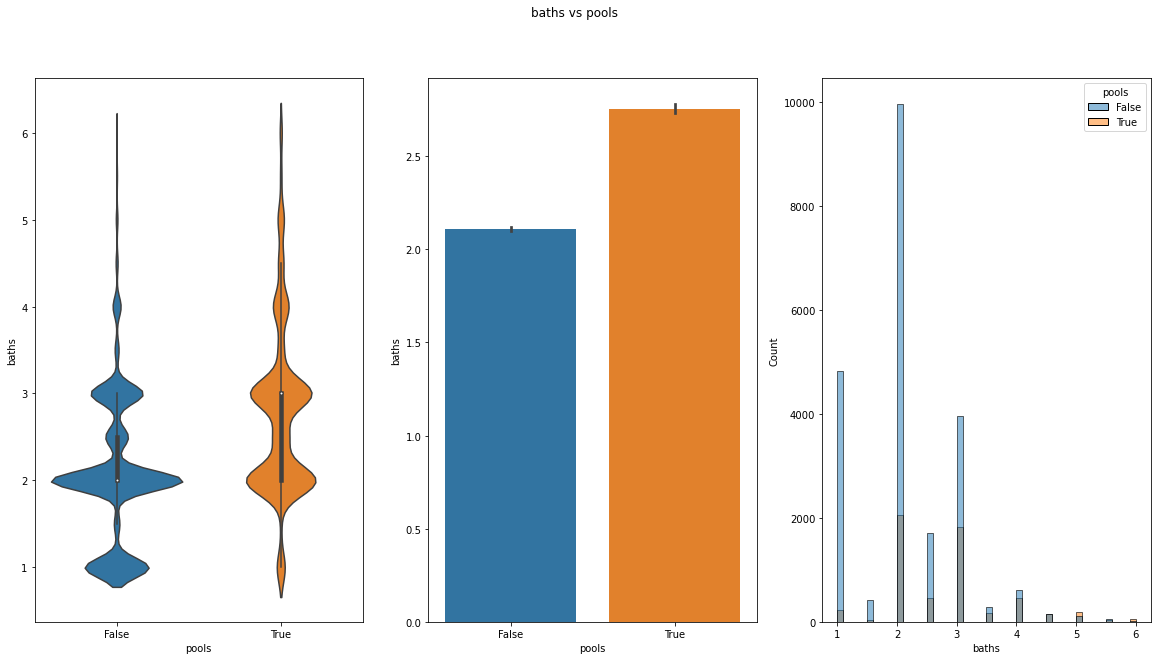

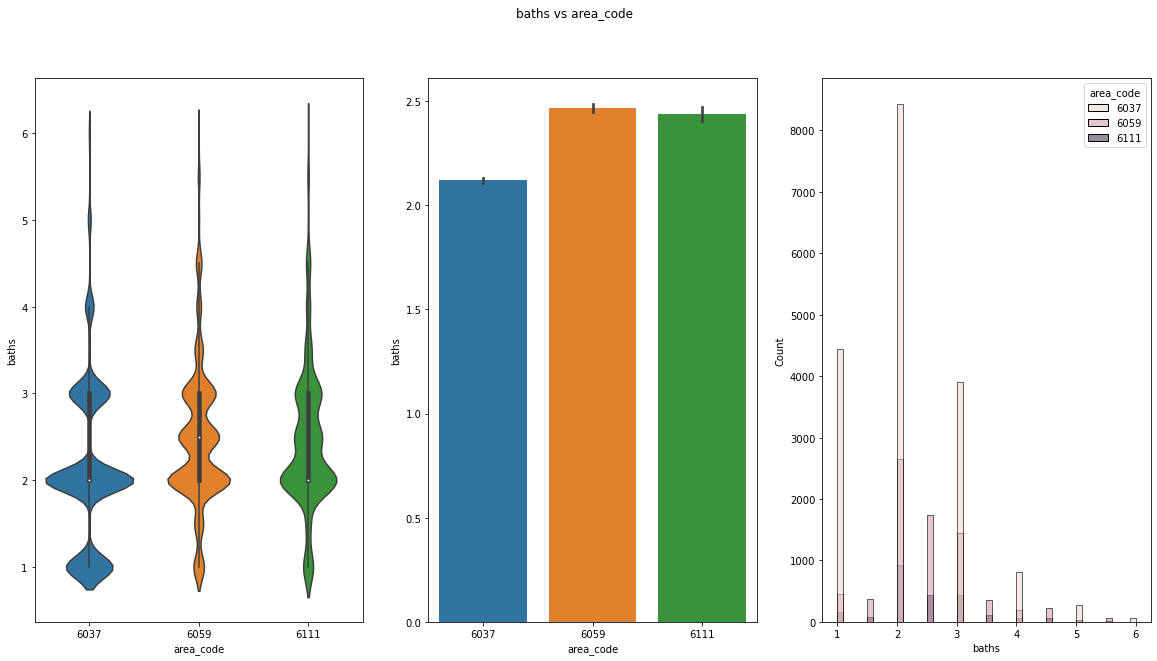

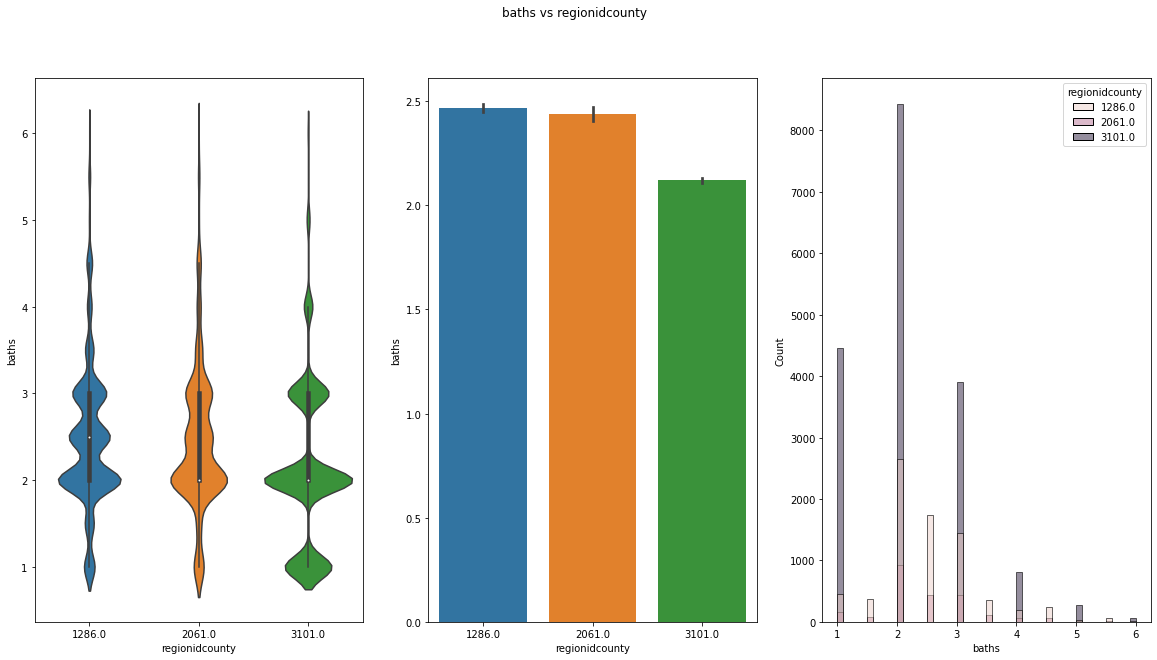

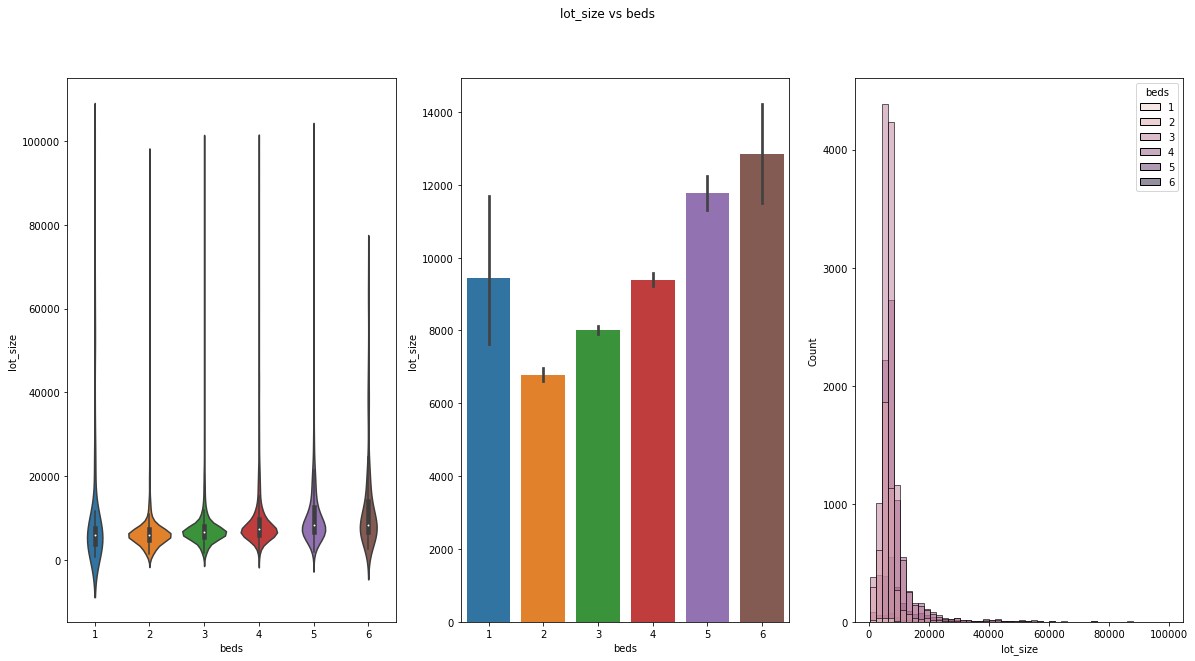

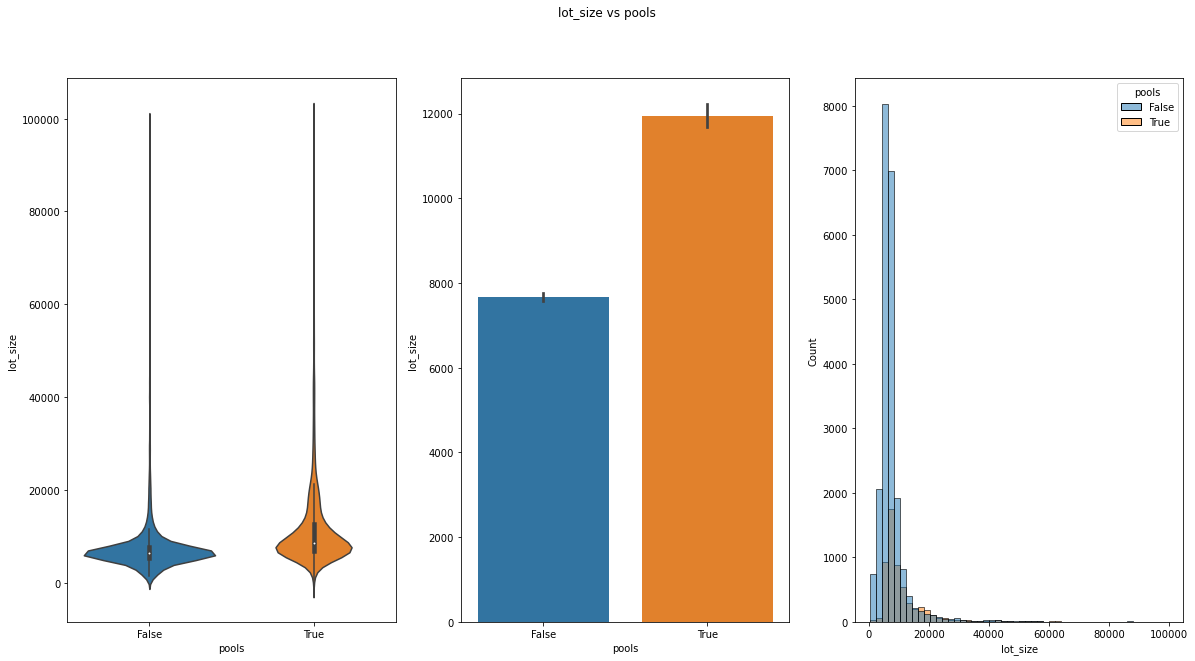

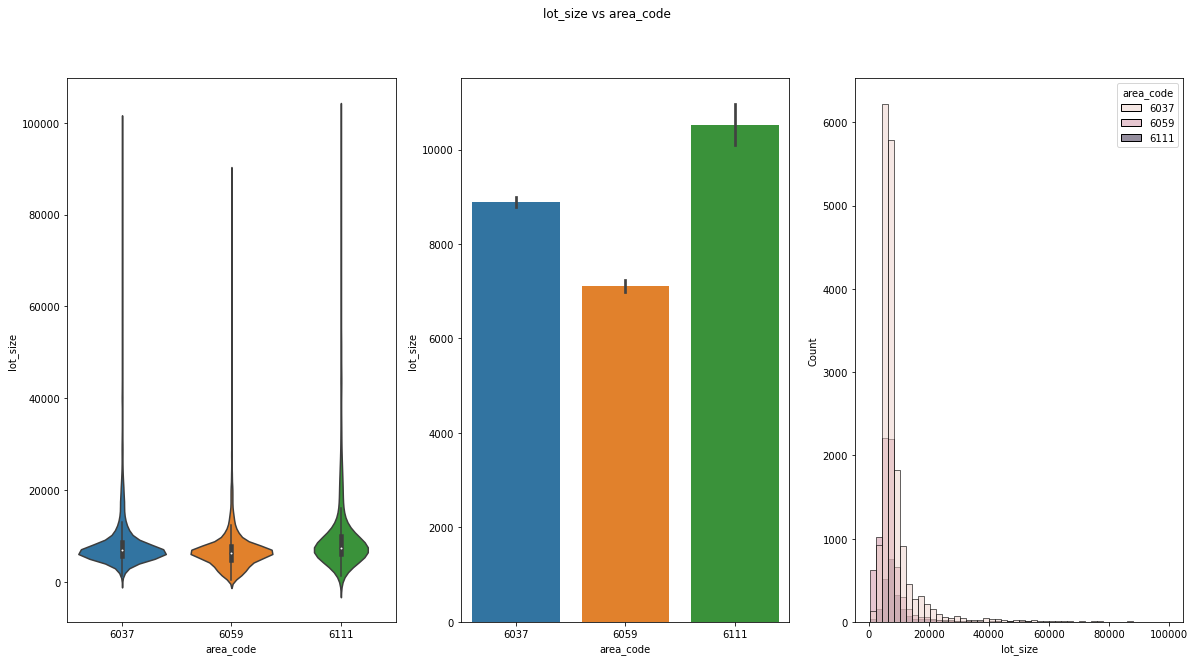

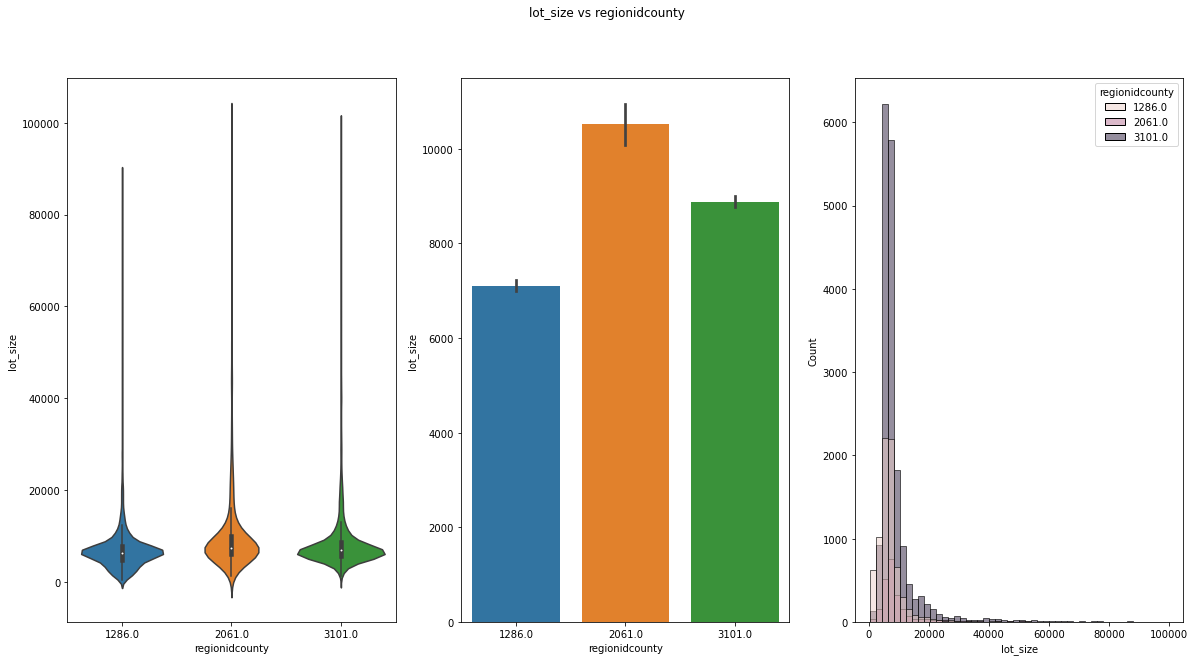

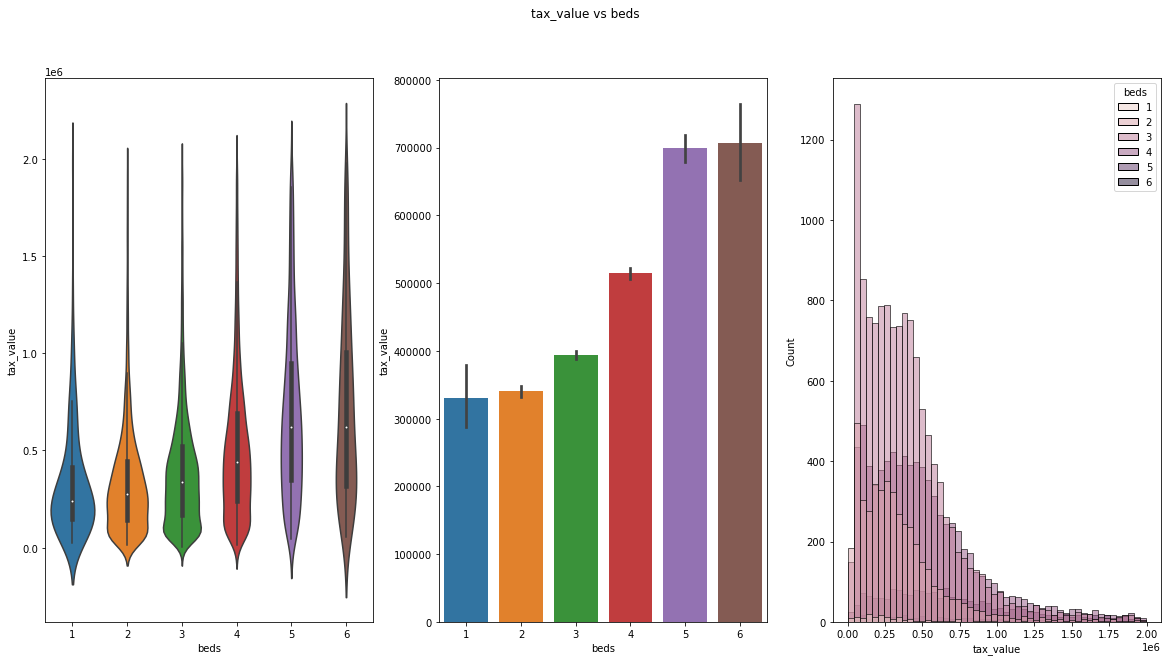

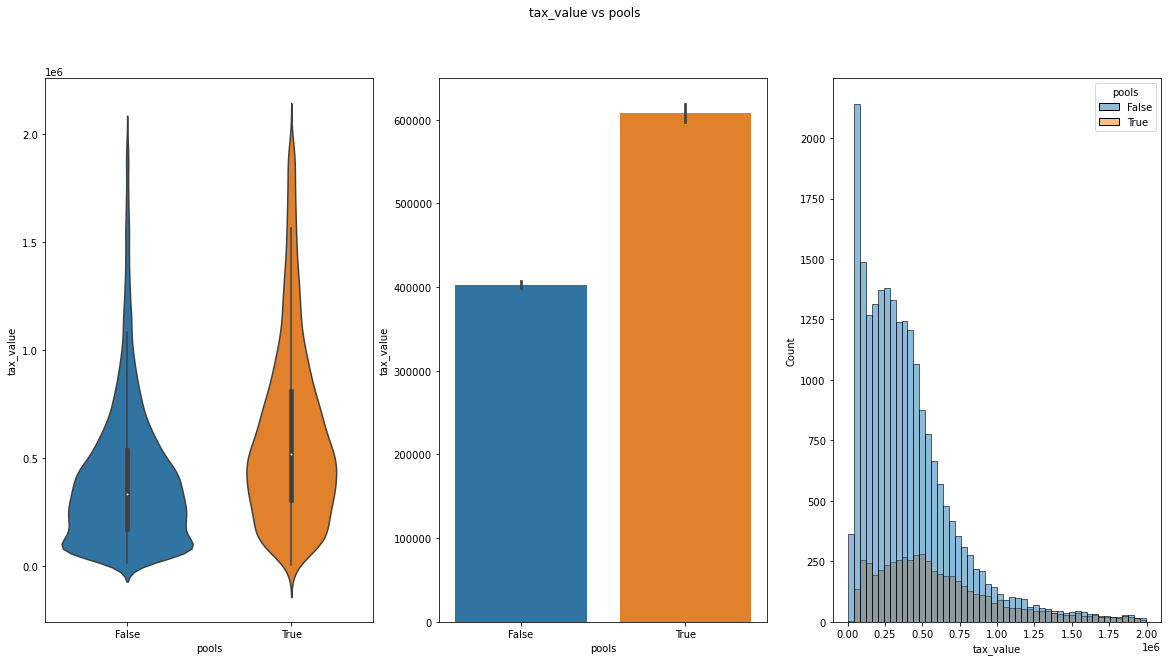

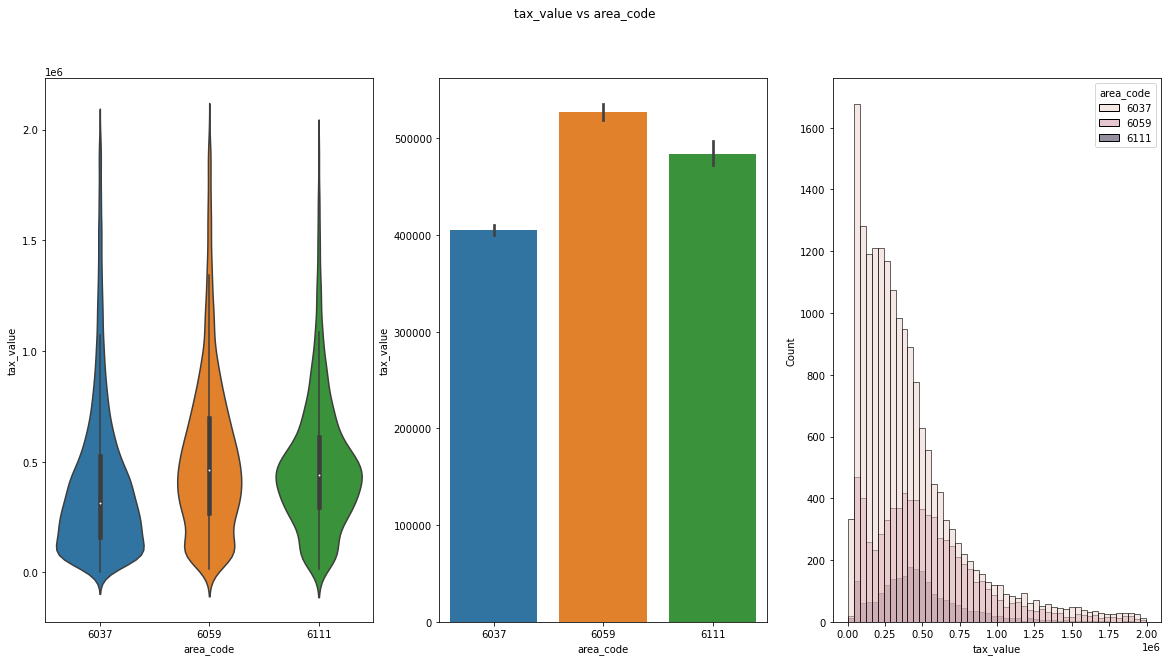

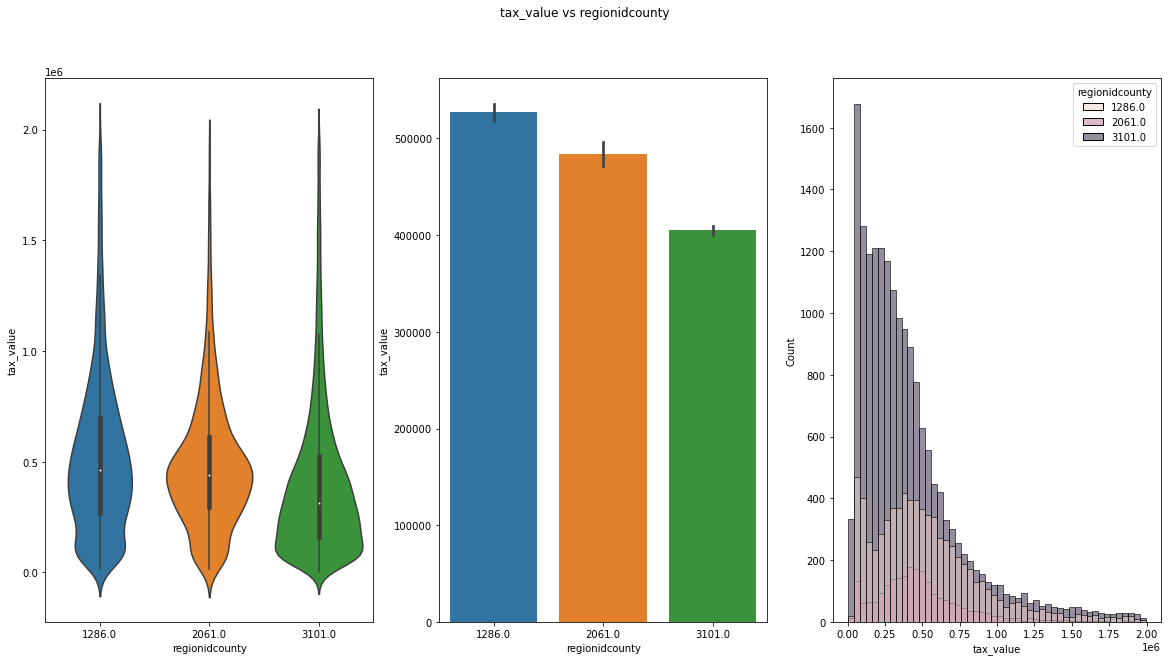

In [12]:
plot_categorical_and_continuous_vars(z_train, cat_cols, cont_cols)